In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import enum
from Py.BS import TypeOptionVanilla
import pandas as pd
from Py.Market import *
from Py.ResultSimulation import *
from Py.BlackScholes import *
from Py.Heston import *
from Py.CalibrationProduct import *
from Py.BarrierOptionProduct import *

from Py.BarrierOptionPricer import *
from Py.MCSensi import *

# import BaseProduct
# from BaseProduct import *

### Create Market

In [3]:
spot = 100
marketObj = Market(spot)
marketObj.initBlack(r= 0.00,repo = 0.000,vol = 0.2)

### Create Model for Pricing

In [4]:
hestonObj = Heston(marketObj,rho = -0.7,Vo = 0.2,nu=0.7)
bsModel = BlackScholesModel(marketObj,sigma= 0.2)

##### Set For calibration

In [5]:
listK = [30,80,100,110,120]
listT = [1,2]
So = 100
listCalibrationProducts = []

for K in listK:
    
    sens = 1 if K <=So else -1
    for T in listT:        
        listCalibrationProducts.append(VanillaProduct(K,T,marketObj,sens))

In [ ]:
hestonObj.calibrate(listCalibrationProducts,verbose=1,listParamToFix=[],maxIter=100)

In [6]:
hestonObj.printParams()

{'kappa': 4, 'theta': 0.2, 'Vo': 0.2, 'nu': 0.7, 'rho': -0.7}

##### Check Calibration

In [7]:
model = hestonObj

In [8]:
[((model.modelPrice(u)-u.value)/u.value)*10000 for u in listCalibrationProducts]

[19.84933128407612,
 95.44671411192652,
 3214.5895754331555,
 4517.740303817917,
 11397.635434389713,
 11296.011323742814,
 6056.051301331602,
 7254.198769369129,
 3396.1712999487513,
 4854.637781039674]

### Create Barrier product and Price

In [11]:
spotRef = 100
maturity = 2
strikeOption = 1.0
BarrierLevel = 0.8
typeBarrier = TypeBarrier.DownAndIn
typeOption = TypeOptionVanilla.Put 
hasRebate = False
rebateCpn = 0.0
Nominal = 100

In [12]:
barrierOptionProduct = BarrierOptionProduct(spotRef = spotRef,maturity = maturity,
                                            strikeOption = strikeOption,
                                            BarrierLevel = BarrierLevel,
                                            typeBarrier = typeBarrier,
                                            typeOption = typeOption,
                                            hasRebate = hasRebate,
                                            rebateCpn = rebateCpn,
                                            Nominal = Nominal )

In [13]:
#listSpots=[0.1,0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4, 1.5,1.7,2,2.5,3]
sensiEngine = GenerateMCSensi(barrierOptionProduct,BarrierOptionPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5,0.6, 0.7,0.75,0.79,0.8,0.81,0.82,0.83,0.85,0.9, 1.0,1.2,1.4,1.7,2,2.5,3])

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.6 is being treated
0.7 is being treated
0.75 is being treated
0.79 is being treated
0.8 is being treated
0.81 is being treated
0.82 is being treated
0.83 is being treated
0.85 is being treated
0.9 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
185.76094770431519


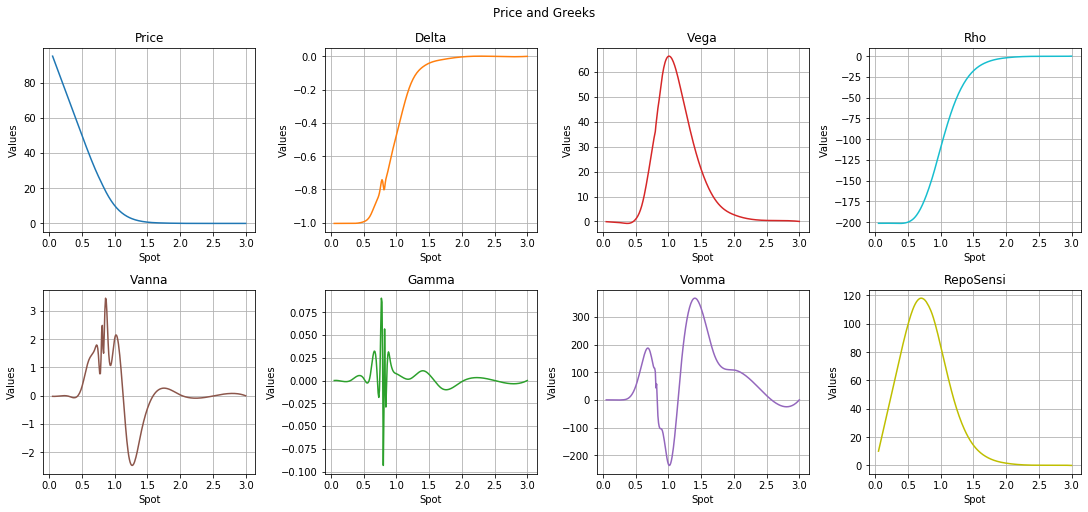

In [14]:
mcSensiPlot(resSensi)

In [9]:
#resSensi

In [10]:
sensiEngine.refPrice

10.15429748369277

In [21]:
# refDif =  bsModel.generatePaths(barrierOptionProduct.maturity,Npaths=50000,listT=barrierOptionProduct.counponsSimulDates())
# productPricer = BarrierOptionPricer(barrierOptionProduct,refDif,marketObj.discount)        
# productPricer.price

### Case Down and Out Put

In [ ]:
spotRef = 100
maturity = 5
strikeOption = 1.125
BarrierLevel = 0.75
typeBarrier = TypeBarrier.DownAndOut
typeOption = TypeOptionVanilla.Put 
hasRebate = False
rebateCpn = 0.0
Nominal = 100

barrierOptionProduct = BarrierOptionProduct(spotRef = spotRef,maturity = maturity,
                                            strikeOption = strikeOption,
                                            BarrierLevel = BarrierLevel,
                                            typeBarrier = typeBarrier,
                                            typeOption = typeOption,
                                            hasRebate = hasRebate,
                                            rebateCpn = rebateCpn,
                                            Nominal = Nominal )

#listSpots=[0.1,0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4, 1.5,1.7,2,2.5,3]
sensiEngine = GenerateMCSensi(barrierOptionProduct,BarrierOptionPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5,0.6, 0.7,0.75,0.8,0.85,0.9, 1.0,1.2,1.4,1.7,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])
mcSensiPlot(resSensi)

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.6 is being treated
0.7 is being treated
0.75 is being treated
0.8 is being treated


In [ ]:
spotRef = 100
maturity = 1 #### Short Maturity
strikeOption = 1.125
BarrierLevel = 0.75
typeBarrier = TypeBarrier.DownAndOut
typeOption = TypeOptionVanilla.Put 
hasRebate = False
rebateCpn = 0.0
Nominal = 100

barrierOptionProduct = BarrierOptionProduct(spotRef = spotRef,maturity = maturity,
                                            strikeOption = strikeOption,
                                            BarrierLevel = BarrierLevel,
                                            typeBarrier = typeBarrier,
                                            typeOption = typeOption,
                                            hasRebate = hasRebate,
                                            rebateCpn = rebateCpn,
                                            Nominal = Nominal )

#listSpots=[0.1,0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,1.3,1.4, 1.5,1.7,2,2.5,3]
sensiEngine = GenerateMCSensi(barrierOptionProduct,BarrierOptionPricer,bsModel,nbSim = 5000,discretStep = Frequency.BiDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5,0.6, 0.7,0.75,0.8,0.85,0.9, 1.0,1.2,1.4,1.7,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])
mcSensiPlot(resSensi)